In [74]:
from datetime import datetime
import json
from settings import _PLOT, _ANN
import pandas as pd

In [58]:
performance = {
    'train': {
        'R2': 0.8,
    },
    'test': {
        'R2': 0.7,
    },
    'time': {
        'training': 2.34, #kljlj
    }
}

In [59]:
workspace = dict(
    hyperparamters = _ANN,
    performance = performance,
)

In [68]:
dateTimeObj = datetime.now()

In [69]:
time_as_string = dateTimeObj.strftime("%d-%b-%Y_%H:%M:%S")

In [84]:
workspace = dict(
    hyperparamters = _ANN,
    performance = performance,
    timestamp = dateTimeObj
)

In [70]:
b = {'run'+time_as_string: workspace}

In [85]:
workspace

{'hyperparamters': {'activation_function': 'relu',
  'epochs': 10,
  'hidden_layers': 2,
  'neurons': 30,
  'scale_data': 'StandardScaler'},
 'performance': {'test': {'R2': 0.7},
  'time': {'training': 2.34},
  'train': {'R2': 0.8}},
 'timestamp': datetime.datetime(2020, 8, 12, 11, 14, 59, 7851)}

In [133]:
filename_json = 'performance_history.json'

In [134]:
with open(filename_json) as f_obj:
    results = json.load(f_obj)

In [138]:
results

{'model_12-Aug-2020_15:49:11': {'hyperparameters': {'activation_function': 'relu',
   'batch_size': 32,
   'epochs': 300,
   'hidden_layers': 3,
   'neurons': 30},
  'info_dataset': {'description': 'test_learning_curve_CO2',
   'file': 'model_art_3.xlsx',
   'output': "'Max CO2'",
   'output_idx': -9},
  'metrics': {'accuracy': {'test': {'MAE': 233.30850830078123,
     'MSE': 6919.327247925861,
     'R2': 0.4082883346256294,
     'RMSE': 83.18249363854068},
    'train': {'MAE': 179.8551025390625,
     'MSE': 2746.2779199270262,
     'R2': 0.7673036012074014,
     'RMSE': 52.40494175101263}},
   'time': {'training': 20.482779076}},
  'preprocessing': {'N_simulations': 1000,
   'random_state': 0,
   'scale_data': 'StandardScaler',
   'test_size': 0.5},
  'timestamp': '12-Aug-2020_15:49:11'},
 'model_12-Aug-2020_15:50:49': {'hyperparameters': {'activation_function': 'relu',
   'batch_size': 32,
   'epochs': 300,
   'hidden_layers': 3,
   'neurons': 30},
  'info_dataset': {'description': '

In [140]:
for model, model_dict in results.items():
    print("\nModel: " + model)
    print("\tfile: " + model_dict['info_dataset']['file'])
    print("\tNSim: " + str(model_dict['preprocessing']['N_simulations']))
    print("\tR2: " + str(sim_dict['metrics']['accuracy']['test']['R2']))


Model: model_12-Aug-2020_15:49:11
	file: model_art_3.xlsx
	NSim: 1000
	R2: 0.8119439619661932

Model: model_12-Aug-2020_15:50:49
	file: model_art_3.xlsx
	NSim: 2000
	R2: 0.8119439619661932

Model: model_12-Aug-2020_15:52:08
	file: model_art_3.xlsx
	NSim: 3000
	R2: 0.8119439619661932

Model: model_12-Aug-2020_15:52:50
	file: model_art_3.xlsx
	NSim: 4000
	R2: 0.8119439619661932

Model: model_12-Aug-2020_15:53:45
	file: model_art_3.xlsx
	NSim: 6000
	R2: 0.8119439619661932

Model: model_12-Aug-2020_15:54:52
	file: model_art_3.xlsx
	NSim: 10000
	R2: 0.8119439619661932

Model: model_12-Aug-2020_15:56:05
	file: model_art_3.xlsx
	NSim: 10000
	R2: 0.8119439619661932


In [75]:
filenameBPS = 'model_art_3.xlsx'
info_data = {'file': filenameBPS, 'idx_output': 3, 'output': 'energy'}
dataset = pd.read_excel('dataset\\' + filenameBPS)

In [83]:
dataset.head()

,'Room depth','Thermal mass',"'U-val, fac'",'WWR','g-value','Overhang','Shad. factor','Shade on','Min air ','Night cool',...,'h>26°C','Max CO2','% > DGNB II','DF>2%',"'Max cool, W/m²'","'Heat, kWh/m²'","'Cool, kWh/m²'","'Vent, kWh/m²'",'Light. kWh/m²','Total energy'
0,6.0,80,0.16,60.0,0.43,40,0.6,52000,1.25,2.5,...,46,800.0,7.5,42.2,0.00,30.36,0.00,11.79,4.01,46.16
1,7.0,80,0.18,75.0,0.32,20,0.8,45000,0.88,1.5,...,80,822.5,7.3,44.3,0.00,19.45,0.00,8.56,6.57,34.58
2,5.0,120,0.12,45.0,0.57,60,0.4,70000,1.63,3.5,...,0,752.2,6.5,30.1,-38.84,30.44,1.94,13.81,2.28,48.49
3,7.5,80,0.14,82.5,0.50,60,0.6,52000,1.06,3.0,...,22,813.5,2.9,38.4,-20.00,13.22,7.17,11.85,8.66,40.90
4,5.5,120,0.20,52.5,0.25,20,0.2,100000,1.81,1.0,...,9,570.1,18.9,31.5,0.00,57.72,0.00,10.71,5.62,74.04


In [82]:
dataset.columns[-9]

"'Max CO2'"

In [124]:
import matplotlib.pyplot as plt

#### ax1 = df.plot.scatter(x='A',
                      y='B',
                      c='DarkBlue')


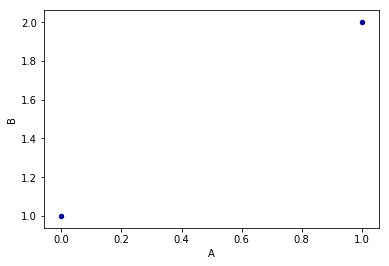

In [132]:
df = pd.DataFrame(columns=["A", "B"])

for i in range(2):
    this_column = df.columns[i]
    df[this_column] = [i, i+1]

ax1 = df.plot.scatter(x='A',
                      y='B',
                      c='DarkBlue')    

In [123]:
df.head()

,A,B
0,0,1
1,1,2
